### Aims
* clean
* visualise
* analyse with plotly dashboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('audible_uncleaned.csv')
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [3]:
print(df.shape)
print(df.columns)
print(df.info())

(87489, 8)
Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None


In [13]:
df.name.duplicated().sum()  # Check for duplicate rows

4722

### Thoughts
* Author has 'Written by' at the beginning and then no space between first name and surname
* narrator has similar problem
* time can be converted to a 24 hour system i think
* Language - check syntax as unique values
* stars column is  mess - seperate into rating and number of ratings. 
* price - convert dtype
* why are there so many names duplicated?

#### Author  column

In [4]:
# author column
print(df.author.head(20))
df.author.tail(20)

0      Writtenby:GeronimoStilton
1          Writtenby:RickRiordan
2           Writtenby:JeffKinney
3          Writtenby:RickRiordan
4          Writtenby:RickRiordan
5       Writtenby:SuzanneCollins
6         Writtenby:WinterMorgan
7          Writtenby:RickRiordan
8      Writtenby:MaryPopeOsborne
9          Writtenby:RickRiordan
10         Writtenby:RickRiordan
11     Writtenby:MaryPopeOsborne
12     Writtenby:MaryPopeOsborne
13         Writtenby:RickRiordan
14       Writtenby:PhilipPullman
15     Writtenby:GeronimoStilton
16     Writtenby:MaryPopeOsborne
17    Writtenby:ShannonMessenger
18     Writtenby:MaryPopeOsborne
19    Writtenby:ShannonMessenger
Name: author, dtype: object


87469                   Writtenby:MarkTwain
87470               Writtenby:LarryMcMurtry
87471                  Writtenby:JeffShaara
87472              Writtenby:LaurenceSterne
87473                  Writtenby:JeffShaara
87474              Writtenby:StephenBrennan
87475              Writtenby:ElisabethEaves
87476              Writtenby:ChelseaHandler
87477            Writtenby:PeterMatthiessen
87478                Writtenby:EdithWharton
87479        Writtenby:MattSmith,KarenSmith
87480                Writtenby:ColinThubron
87481                Writtenby:ColinThubron
87482    Writtenby:DonWatson,HamishHamilton
87483             Writtenby:RogerW.Thompson
87484                Writtenby:ChrisStewart
87485               Writtenby:StephenO'Shea
87486                   Writtenby:MarkTwain
87487              Writtenby:LaurenceSterne
87488               Writtenby:MarkKurlansky
Name: author, dtype: object

In [8]:
print(df.author.value_counts())
df.narrator.value_counts()


author
Writtenby:矢島雅弘,石橋遊                                              874
Writtenby:SmartReading                                          405
Writtenby:中西貴之,BJ                                               311
Writtenby:div.                                                  274
Writtenby:OnlineStudioProductions                               212
                                                               ... 
Writtenby:AlessandroGoglio,AndreaGoldstein                        1
Writtenby:DianaThomas,StaceyBoyle                                 1
Writtenby:KarieWillyerd,BarbaraMistick,JosephGrenny-foreword      1
Writtenby:FrancesKay                                              1
Writtenby:StephenO'Shea                                           1
Name: count, Length: 48374, dtype: int64


narrator
Narratedby:anonymous                      1034
Narratedby:矢島雅弘,石橋遊                        874
Narratedby:Intuitive                       465
Narratedby:uncredited                      326
Narratedby:中西貴之,BJ                         311
                                          ... 
Narratedby:HannahB.                          1
Narratedby:DavidSimonM.D.,DeepakChopra       1
Narratedby:CorinneZupko                      1
Narratedby:SandraIngerman                    1
Narratedby:ChrisStewart                      1
Name: count, Length: 29717, dtype: int64

<BarContainer object of 10 artists>

c:\Users\drysd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from current font.
  func(*args, **kwargs)
c:\Users\drysd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from current font.
  func(*args, **kwargs)
c:\Users\drysd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from current font.
  func(*args, **kwargs)
c:\Users\drysd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from current font.
  func(*args, **kwargs)
c:\Users\drysd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30707 (\N{CJK UNIFIED IDEOGRAPH-77F3}) missing from current font.
  func(*args, **kwargs)
c:\Users\drysd\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27211 (\N{CJK UN

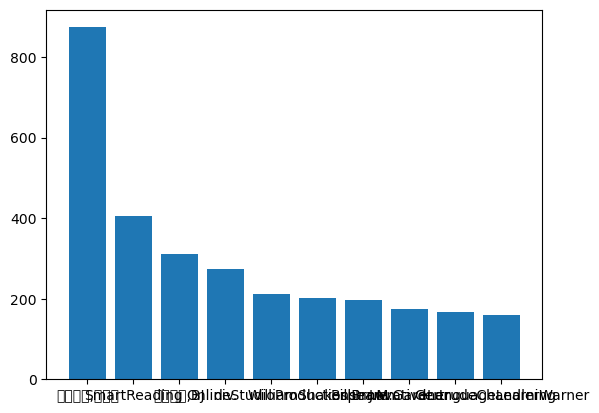

In [ ]:
# get rid of wrritenby
df['author'] = df.author.str.replace('Writtenby:', '', regex=False)
# potential problems with commas and multiple authors and that names are one string without surnames seperated.

#### Narrator column

In [17]:
# get rid of Narratedby
df['narrator'] = df.narrator.str.replace('Narratedby:', '', regex=False)
df.head()
# again potential problems with commas and multiple narrators and that names are one string without surnames seperated.

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
